# CONVOLUTIONAL NEURAL NETWORKS

CNNs have certain features that identify patterns in images because of "convolution operation" including:
- Dense layers learn global patterns in their input feature space
- Convolution layers learn local patterns, and this leads to the following interesting features:
    - Unlike with densely connected networks, when a convolutional neural network recognizes a pattern in one region, these insights can be shared and applied to other regions.
    - Deeper convolutional neural networks can learn spatial hierarchies. A first layer will learn small local patterns, a second layer will learn larger patterns using features of the first layer patterns, etc.

Because of these properties, CNNs are great for tasks like:
- Image classification
- Object detection in images
- Picture neural style transfer

## CNN RECAP

 - CNNs are a useful model for image recognition due to their ability to recognize visual patterns at varying scales
 - The essence of a CNN is a convolutional operation, where a window is slid across the image based on a stride size
 - Padding can be used to prevent shrinkage and make sure pixels at the edge of an image receive the necessary attention
 - Max pooling is typically used between convolutional layers to reduce the dimensionality
 - After developing the convolutional and pooling layers to form a base, the end of the network architecture still connects back to a densely connected network to perform classification
 
 ### CNN - Santa Images
 Let's import libraries `os` and `shutil`, as we'll need them to create the new folders and move the new files in there.

In [1]:
import os, shutil

Below we create three objects representing the existing directories: `data/santa/` as `data_santa_dir` and `data/not_santa/` as `data_not_santa_dir`. We will create a new directory `split/` as `new_dir`, where we will split the dataset in three groups (or three subdirectories): `train`, `test`, and `validation`, each containing `santa` and `not_santa` subfolders. The final desired structure is represented below: 

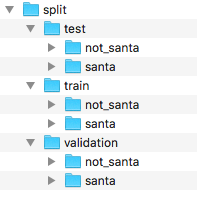

In [ ]:
data_santa_dir = 'data/santa/'
data_not_santa_dir = 'data/not_santa/'
new_dir = 'split/'

You can use `os.listdir()` to create an object that stores all the relevant image names. 

In [ ]:
imgs_santa = [file for file in os.listdir(data_santa_dir) if file.endswith('.jpg')]

In [ ]:
#Number of images in santa directory
print('There are', len(imgs_santa), 'santa images')

In [ ]:
#Doing the same for not santa images
imgs_not_santa = [file for file in os.listdir(data_not_santa_dir) if file.endswith('.jpg')]

print('There are', len(imgs_not_santa), 'images without santa')

Create all the folders and subfolders in order to get the structure represented above. You can use `os.path.join()` to create strings that will be used later on to generate new directories.

In [ ]:
os.mkdir(new_dir)

In [ ]:
train_folder = os.path.join(new_dir, 'train')
train_santa = os.path.join(train_folder, 'santa')
train_not_santa = os.path.join(train_folder, 'not_santa')

test_folder = os.path.join(new_dir, 'test')
test_santa = os.path.join(test_folder, 'santa')
test_not_santa = os.path.join(test_folder, 'not_santa')

val_folder = os.path.join(new_dir, 'validation')
val_santa = os.path.join(val_folder, 'santa')
val_not_santa = os.path.join(val_folder, 'not_santa')

In [ ]:
train_santa

Now use all the path strings you created to make new directories. You can use `os.mkdir()` to do this. Go have a look at your directory and see if this worked!

In [ ]:
os.mkdir(test_folder)
os.mkdir(test_santa)
os.mkdir(test_not_santa)

os.mkdir(train_folder)
os.mkdir(train_santa)
os.mkdir(train_not_santa)

os.mkdir(val_folder)
os.mkdir(val_santa)
os.mkdir(val_not_santa)

Copy the Santa images in the three santa subfolders. Let's put the first 271 images in the training set, the next 100 images in the validation set and the final 90 images in the test set.

In [ ]:
# train santa
imgs = imgs_santa[:271]
for img in imgs:
    origin = os.path.join(data_santa_dir, img)
    destination = os.path.join(train_santa, img)
    shutil.copyfile(origin, destination)

In [ ]:
# validation santa
imgs = imgs_santa[271:371]
for img in imgs:
    origin = os.path.join(data_santa_dir, img)
    destination = os.path.join(val_santa, img)
    shutil.copyfile(origin, destination)

In [ ]:
# test santa
imgs = imgs_santa[371:]
for img in imgs:
    origin = os.path.join(data_santa_dir, img)
    destination = os.path.join(test_santa, img)
    shutil.copyfile(origin, destination)

Now, repeat all this for the `not_santa` images!

In [ ]:
# train not_santa
imgs = imgs_not_santa[:271]
for img in imgs:
    origin = os.path.join(data_not_santa_dir, img)
    destination = os.path.join(train_not_santa, img)
    shutil.copyfile(origin, destination)
# validation not_santa
imgs = imgs_not_santa[271:371]
for img in imgs:
    origin = os.path.join(data_not_santa_dir, img)
    destination = os.path.join(val_not_santa, img)
    shutil.copyfile(origin, destination)
# test not_santa
imgs = imgs_not_santa[371:]
for img in imgs:
    origin = os.path.join(data_not_santa_dir, img)
    destination = os.path.join(test_not_santa, img)
    shutil.copyfile(origin, destination)

Let's print out how many images we have in each directory so we know for sure our numbers are right!

In [ ]:
print('There are', len(os.listdir(train_santa)), 'santa images in the training set')

In [ ]:
print('There are', len(os.listdir(val_santa)), 'santa images in the validation set')

In [ ]:
print('There are', len(os.listdir(test_santa)), 'santa images in the test set')

In [ ]:
print('There are', len(os.listdir(train_not_santa)), 'images without santa in the train set')

In [ ]:
print('There are', len(os.listdir(val_not_santa)), 'images without santa in the validation set')

In [ ]:
print('There are', len(os.listdir(test_not_santa)), 'images without santa in the test set')

### Use a densely connected network as a baseline
Now that we've a handle on our data, we can easily use Keras' module with image-processing tools. Let's import the necessary libraries below. 

In [2]:
import time
import matplotlib.pyplot as plt
import scipy
import numpy as np
from PIL import Image
from scipy import ndimage
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

np.random.seed(123)

ImportError: cannot import name 'array_to_img' from 'keras.preprocessing.image' (C:\Users\msagu\anaconda3\envs\learn-env\lib\site-packages\keras\preprocessing\image.py)

In [ ]:
# get all the data in the directory split/test (180 images), and reshape them
test_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        test_folder, 
        target_size=(64, 64), batch_size = 180) 

# get all the data in the directory split/validation (200 images), and reshape them
val_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        val_folder, 
        target_size=(64, 64), batch_size = 200)

# get all the data in the directory split/train (542 images), and reshape them
train_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        train_folder, 
        target_size=(64, 64), batch_size=542)

In [ ]:
# create the data sets
train_images, train_labels = next(train_generator)
test_images, test_labels = next(test_generator)
val_images, val_labels = next(val_generator)

In [ ]:
# Explore your dataset again
m_train = train_images.shape[0]
num_px = train_images.shape[1]
m_test = test_images.shape[0]
m_val = val_images.shape[0]

print ("Number of training samples: " + str(m_train))
print ("Number of testing samples: " + str(m_test))
print ("Number of validation samples: " + str(m_val))
print ("train_images shape: " + str(train_images.shape))
print ("train_labels shape: " + str(train_labels.shape))
print ("test_images shape: " + str(test_images.shape))
print ("test_labels shape: " + str(test_labels.shape))
print ("val_images shape: " + str(val_images.shape))
print ("val_labels shape: " + str(val_labels.shape))

In [ ]:
train_img = train_images.reshape(train_images.shape[0], -1)
test_img = test_images.reshape(test_images.shape[0], -1)
val_img = val_images.reshape(val_images.shape[0], -1)

print(train_img.shape)
print(test_img.shape)
print(val_img.shape)

In [ ]:
train_y = np.reshape(train_labels[:,0], (542,1))
test_y = np.reshape(test_labels[:,0], (180,1))
val_y = np.reshape(val_labels[:,0], (200,1))

In [ ]:
# Build a baseline fully connected model
from keras import models
from keras import layers
np.random.seed(123)
model = models.Sequential()
model.add(layers.Dense(20, activation='relu', input_shape=(12288,))) # 2 hidden layers
model.add(layers.Dense(7, activation='relu'))
model.add(layers.Dense(5, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

histoire = model.fit(train_img,
                    train_y,
                    epochs=50,
                    batch_size=32,
                    validation_data=(val_img, val_y))

In [ ]:
results_train = model.evaluate(train_img, train_y)

In [ ]:
results_test = model.evaluate(test_img, test_y)

In [ ]:
results_train

In [ ]:
results_test

Remember that, in our previous lab on building deeper neural networks from scratch, we obtained a training accuracy of 95%, and a test set accuracy of 74.23%. 

This result is similar to what we got building our manual "deeper" dense model. The results are not entirely different. This is not a surprise!
- Before, we only had a training and a validation set (which was at the same time the test set). Now we have split up the data 3-ways.
- We didn't use minibatches before, yet we used mini-batches of 32 units here.

### Building a CNN

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(64 ,64,  3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(32, (4, 4), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer="sgd",
              metrics=['acc'])

In [ ]:
history = model.fit(train_images,
                    train_y,
                    epochs=30,
                    batch_size=32,
                    validation_data=(val_images, val_y))

In [ ]:
results_train = model.evaluate(train_images, train_y)

In [ ]:
results_test = model.evaluate(test_images, test_y)

In [ ]:
results_train

In [ ]:
results_test

### Data Augmentation
`ImageDataGenerator()` becomes really useful when we *actually* want to generate more data. We'll show you how this works. 

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255, 
                                   rotation_range=40, 
                                   width_shift_range=0.2, 
                                   height_shift_range=0.2, 
                                   shear_range=0.3, 
                                   zoom_range=0.1, 
                                   horizontal_flip=False)

In [ ]:
names = [os.path.join(train_santa, name) for name in os.listdir(train_santa)]
img_path = names[91]
img = load_img(img_path, target_size=(64, 64))

reshape_img = img_to_array(img) 
reshape_img = reshape_img.reshape((1,) + reshape_img.shape) 
i=0
for batch in train_datagen.flow(reshape_img, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(array_to_img(batch[0]))
    i += 1
    if i % 3 == 0:
        break
plt.show()

In [ ]:
# get all the data in the directory split/test (180 images), and reshape them
test_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        test_folder, 
        target_size=(64, 64), 
        batch_size = 180,
        class_mode='binary') 

# get all the data in the directory split/validation (200 images), and reshape them
val_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        val_folder, 
        target_size=(64, 64),
        batch_size = 32,
        class_mode='binary')

# get all the data in the directory split/train (542 images), and reshape them
train_generator = train_datagen.flow_from_directory(
        train_folder, 
        target_size=(64, 64), 
        batch_size = 32, 
        class_mode='binary')

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(64 ,64,  3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(32, (4, 4), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer= 'sgd',
              metrics=['acc'])

In [ ]:
history_2 = model.fit_generator(train_generator, 
                                steps_per_epoch=25, 
                                epochs=30, 
                                validation_data=val_generator, 
                                validation_steps=25)

In [ ]:
test_x, test_y = next(test_generator)

In [ ]:
results_test = model.evaluate(test_x, test_y)

In [ ]:
results_test

## Building a CNN - Cats & Dogs Classiffier
### Loading Images

In [ ]:
# Load the images
train_dir = 'cats_dogs_downsampled/train'
validation_dir = 'cats_dogs_downsampled/val/'
test_dir = 'cats_dogs_downsampled/test/' 

In [3]:
import datetime

original_start = datetime.datetime.now()
start = datetime.datetime.now()

In [ ]:
# Preprocess the images into tensors
# Rescale the data by 1/.255 and use binary_crossentropy loss

from keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = val_datagen.flow_from_directory(validation_dir,
                                                        target_size=(150, 150),
                                                        batch_size=20,
                                                        class_mode='binary')

### Designing the Model
- Alternate convolutional and pooling layers
- Have later layers have a larger number of parameters in order to detect more abstract patterns
- Add some final dense layers to add a classifier to the convolutional base 
- Compile this model 

In [ ]:
# Design the model
# Note: You may get a comment from tf regarding your kernel. This is not a warning per se, but rather informational.

from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
# Compile the model
from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

### Training & Evaluating Model
Remember that training deep networks is resource intensive: depending on the size of the data, even a CNN with 3-4 successive convolutional and pooling layers is apt to take a hours to train on a high end laptop. Using 30 epochs and 8 layers (alternating between convolutional and pooling), our model took about 40 minutes to run on a year old macbook pro.

If you are concerned with runtime, you may want to set your model to run the training epochs overnight.  

**If you are going to run this process overnight, be sure to also script code for the following questions concerning data augmentation. Check your code twice (or more) and then set the notebook to run all, or something equivalent to have them train overnight.** 

In [ ]:
# Set the model to train 
# Note: You may get a comment from tf regarding your GPU or sometning similar.
# This is not a warning per se, but rather informational.
# ⏰ This cell may take several minutes to run
history = model.fit(train_generator, 
                              steps_per_epoch=100, 
                              epochs=30, 
                              validation_data=validation_generator, 
                              validation_steps=20)

In [ ]:
# Plot history

import matplotlib.pyplot as plt
%matplotlib inline 

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
# Check runtime
end = datetime.datetime.now()
elapsed = end - start
print('Training took a total of {}'.format(elapsed))

In [ ]:
# Save the model for future reference 
model.save('cats_dogs_downsampled_data.h5')

### Data Augmentation
Recall that data augmentation is typically always a necessary step when using a small dataset as this one which you have been provided. As such, if you haven't already, implement a data augmentation setup.

**Warning: ⏰ This process took nearly 4 hours to run on a relatively new macbook pro. As such, it is recommended that you simply code the setup and compare to the solution branch, or set the process to run overnight if you do choose to actually run the code.** 

In [ ]:
# Set-up date time to track how long run time takes
start = datetime.datetime.now()

In [ ]:

train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40, 
                                   width_shift_range=0.2, 
                                   height_shift_range=0.2, 
                                   shear_range=0.2, 
                                   zoom_range=0.2, 
                                   horizontal_flip=True, 
                                   fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

history = model.fit(train_generator, 
                              steps_per_epoch=100, 
                              epochs=30, 
                              validation_data=validation_generator, 
                              validation_steps=20)

In [ ]:

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
# Check runtime
end = datetime.datetime.now()
elapsed = end - start
print('Training with data augmentation took a total of {}'.format(elapsed))

In [ ]:
# Save the model 
model.save('cats_dogs_downsampled_with_augmentation_data.h5')

### Final Evaluation

Now use the test set to perform a final evaluation on your model of choice.

In [ ]:
# Perform a final evaluation using the test set

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(test_dir, 
                                                  target_size=(150, 150), 
                                                  batch_size=20, 
                                                  class_mode='binary')
test_loss, test_acc = model.evaluate(test_generator, steps=20)
print('test acc:', test_acc)

#### Summary

Well done! In this lab, you practice building your own CNN for image recognition which drastically outperformed our previous attempts using a standard deep learning model alone. In the upcoming sections, we'll continue to investigate further techniques associated with CNNs including visualizing the representations they learn and techniques to further bolster their performance when we have limited training data such as here.

## Visualizing Intermediate Activations
- Load a saved Keras model
- Use Keras methods to visualize the activation functions in CNNs

#### Loading Saved Model

In [ ]:
from keras.models import load_model

model = load_model('cats_dogs_downsampled_with_augmentation_data.h5')
# As a reminder 
model.summary() 

#### Loading an Image from the Training Set

In [4]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
img_path = 'images/dog.1100.jpg'

img = image.load_img(img_path, target_size=(150, 150))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)

#Follow the Original Model Preprocessing
img_tensor /= 255.

#Check tensor shape
print(img_tensor.shape)

#Preview an image
plt.imshow(img_tensor[0])
plt.show()

#### Visualizing a Layer
In order to get a better sense of what representations our CNN is learning under the hood, we will visualize the feature maps generated during training. Recall from our previous discussions that CNNs work by applying a filter successively over an image. This transformation creates a new representation of the image which we call a feature map.

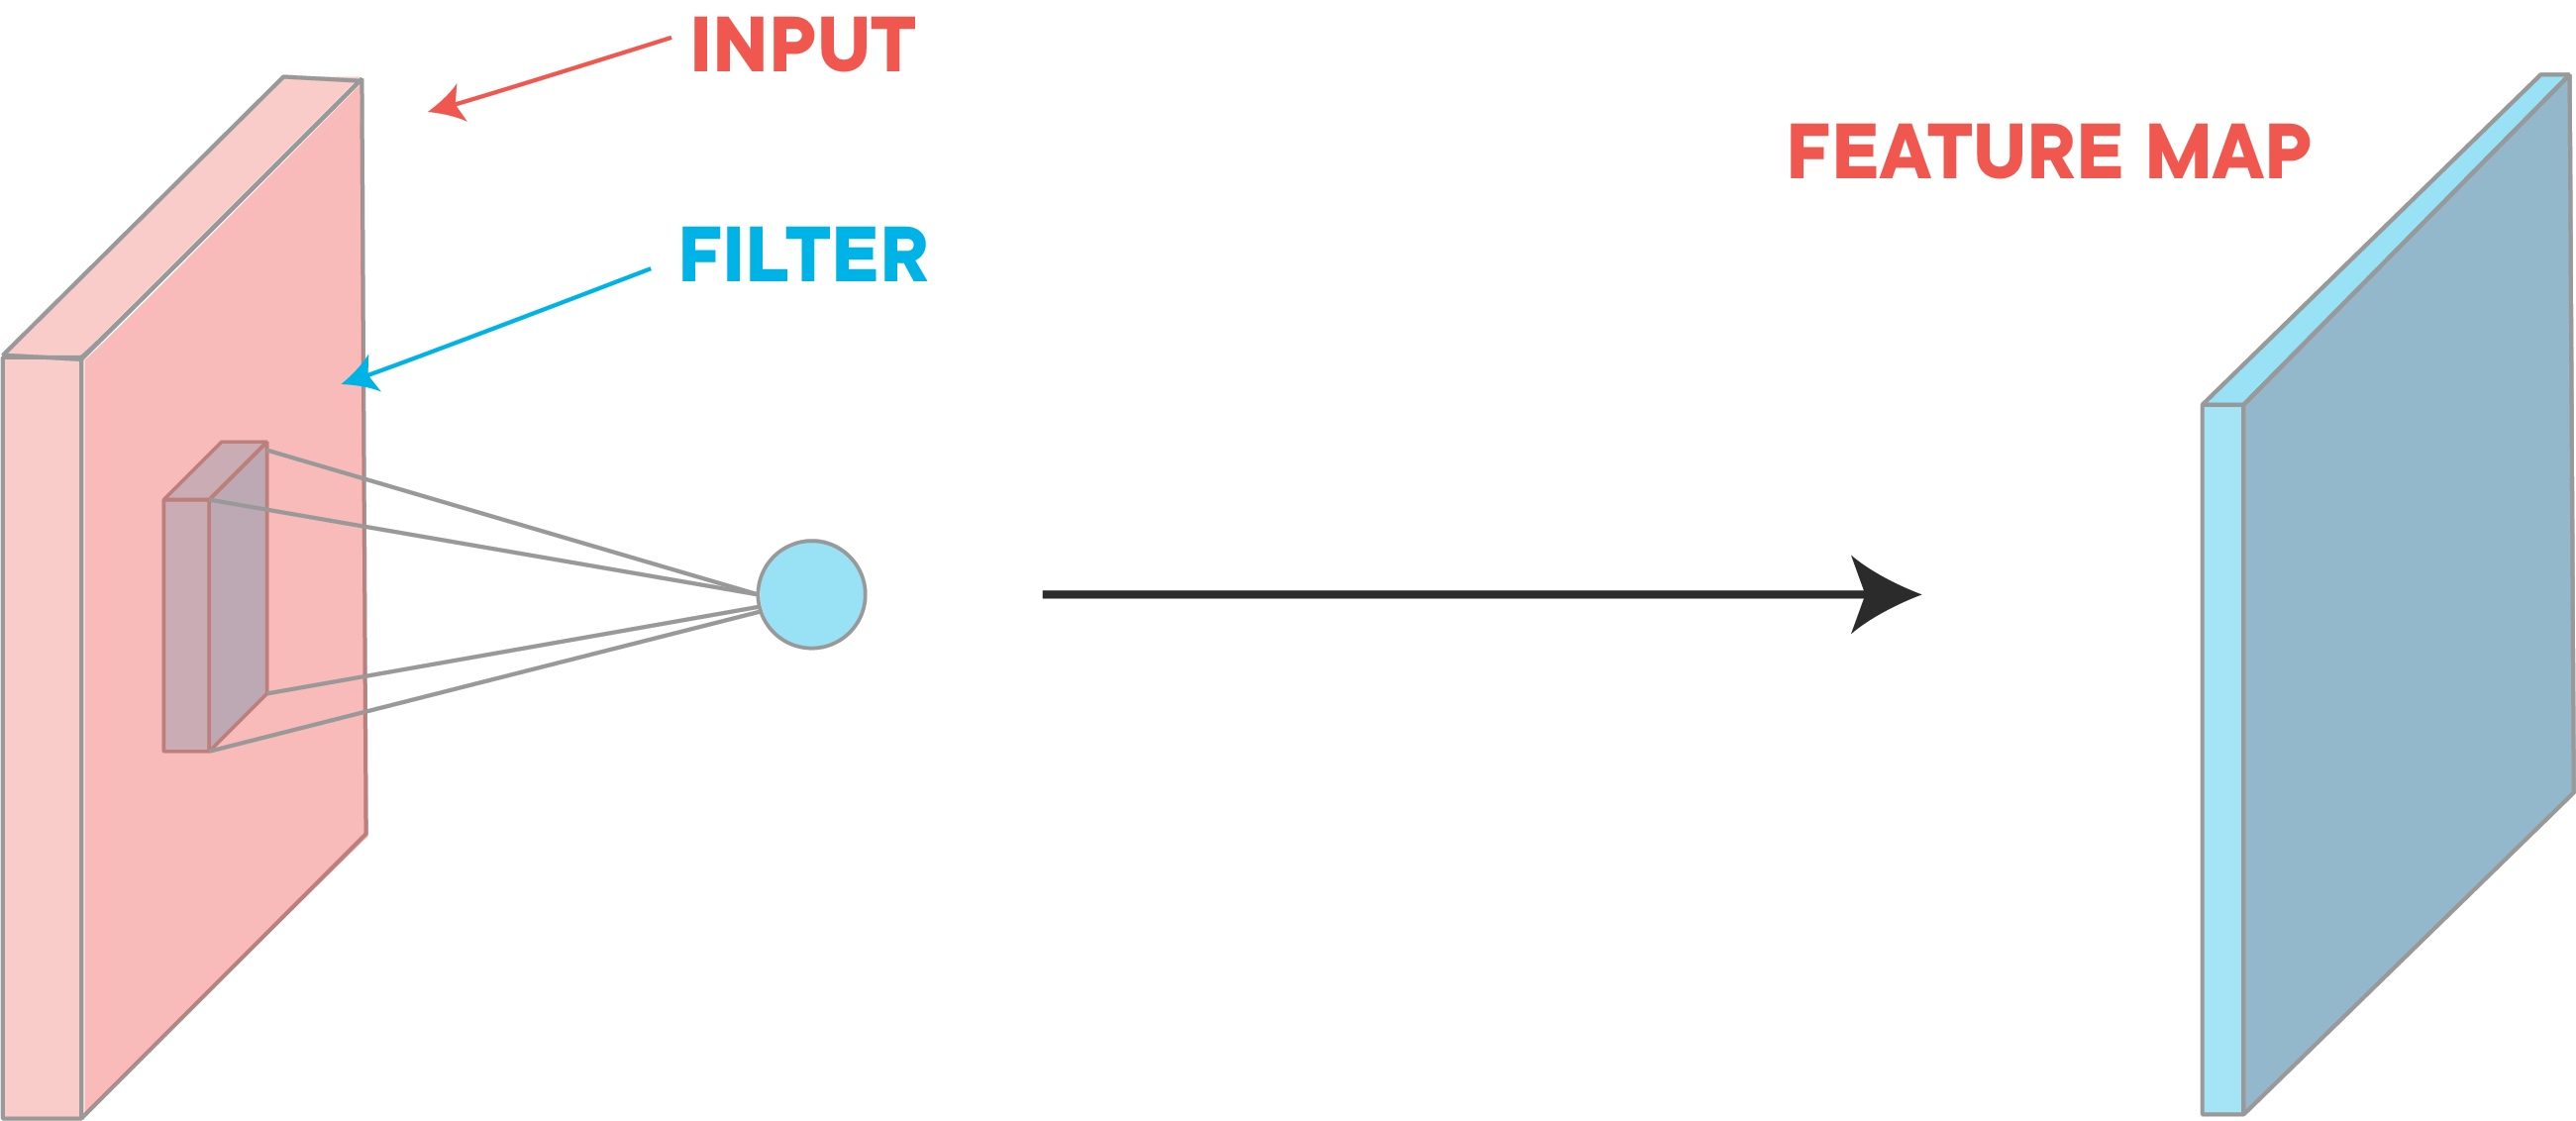

In [5]:
from keras import models

In [ ]:
# Extract model layer outputs
layer_outputs = [layer.output for layer in model.layers[:8]]

# Rather then a model with a single output, we are going to make a model to display the feature maps
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

If you return to the model summary, you can inspect the third dimension of each activation layer's output.

In [ ]:
model.summary()

From this, you can see that the initial two layers output feature maps that have 32 channels each. You can visualize each of these channels individually by slicing the tensor along that axis. Subsequentially, the next two layers have 64 channels each and the 5th through 8th layers have 128 channels each. Recall that this allows the CNN to detect successively more abstract patterns. Here's what slicing one of these feature maps and visualizing an individual channel looks like in practice:

In [ ]:
# Returns an array for each activation layer
activations = activation_model.predict(img_tensor)

first_layer_activation = activations[0]
print(first_layer_activation.shape)

# We slice the third channel and preview the results
plt.matshow(first_layer_activation[0, :, :, 3], cmap='viridis')
plt.show()

In [ ]:
# Repeating the process for another channel (the 30th)
activations = activation_model.predict(img_tensor)

first_layer_activation = activations[0]
print(first_layer_activation.shape)

plt.matshow(first_layer_activation[0, :, :, 30], cmap='viridis')
plt.show()

More extensively, we could also visualize all 32 of these channels from the first activation function.

In [ ]:
fig, axes = plt.subplots(8, 4, figsize=(12,24))
for i in range(32):
    row = i//4
    column = i%4
    ax = axes[row, column]
    first_layer_activation = activations[0]
    ax.matshow(first_layer_activation[0, :, :, i], cmap='viridis')

#### Repeating for all Layers

Similarly, you could also visualize other layers. Below is the visualization of the 29th channel for each of the activation layers. (Recall that there are more channels in later layers.)

In [ ]:
fig, axes = plt.subplots(2,4, figsize=(12,8))

layer_names = []
for layer in model.layers[:8]:
    layer_names.append(layer.name)

for i in range(8):
    row = i//4
    column = i%4
    ax = axes[row, column]
    cur_layer = activations[i]
    ax.matshow(cur_layer[0, :, :, 29], cmap='viridis')
    ax.xaxis.set_ticks_position('bottom')
    ax.set_title(layer_names[i])

Note how the later layers are more abstract representations, and in the case of the final two layers, we see nothing at all. This demonstrates how the representations learned by CNN architectures become increasingly abstract with the depth of the layers. In the case of the blank images displayed, this indicates that the patterns were not present in the current image.

#### Summary

We have investigated how you can visualize feature maps, the representations learned by CNNs during training. While outside the scope of this lesson, there are other visualization techniques for CNNs such as visualizing the filters themselves, or visualizing heatmaps of the original image to identify where in an image patterns were identified. In the upcoming lab, you'll continue to practice visualizing feature maps, as you did here creating a complete visualization of all channels within each of the 8 model layers.